In [1]:
"""
From chapter 6 in 'Apprentissage prodond avec python' from François CHOLLET
"""

"\nFrom chapter 6 in 'Apprentissage prodond avec python' from François CHOLLET\n"

In [1]:
import keras
from keras import layers
from keras.models import Sequential
from keras.datasets import imdb
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
gpu = physical_devices[0]
gpu

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')

# Data processing

In [3]:
max_feature = 10_000
maxlen = 500
batch_size = 32

In [4]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_feature)
x_train.shape, x_test.shape, np.unique(y_train)

((25000,), (25000,), array([0, 1], dtype=int64))

In [5]:
x_train = tf.keras.utils.pad_sequences(x_train, maxlen=maxlen)
x_test = tf.keras.utils.pad_sequences(x_test, maxlen=maxlen)
x_train.shape, x_test.shape

((25000, 500), (25000, 500))

# Model

In [11]:
model = Sequential()
model.add(layers.Embedding(max_feature, 32))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation="sigmoid"))

In [12]:
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["acc"]
)

In [13]:
history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/10
625/625 [==============================] - 16s 19ms/step - loss: 0.4418 - acc: 0.7965 - val_loss: 0.3116 - val_acc: 0.8764
Epoch 2/10
625/625 [==============================] - 11s 18ms/step - loss: 0.2697 - acc: 0.8936 - val_loss: 0.4421 - val_acc: 0.8068
Epoch 3/10
625/625 [==============================] - 11s 18ms/step - loss: 0.2257 - acc: 0.9148 - val_loss: 0.2844 - val_acc: 0.8940
Epoch 4/10
625/625 [==============================] - 11s 18ms/step - loss: 0.1979 - acc: 0.9275 - val_loss: 0.2774 - val_acc: 0.8908
Epoch 5/10
625/625 [==============================] - 11s 18ms/step - loss: 0.1832 - acc: 0.9336 - val_loss: 0.2938 - val_acc: 0.8848
Epoch 6/10
625/625 [==============================] - 11s 18ms/step - loss: 0.1717 - acc: 0.9370 - val_loss: 0.3424 - val_acc: 0.8766
Epoch 7/10
625/625 [==============================] - 11s 18ms/step - loss: 0.1583 - acc: 0.9421 - val_loss: 0.3029 - val_acc: 0.8906
Epoch 8/10
625/625 [==============================] - 11s 18ms

# Display performances curves

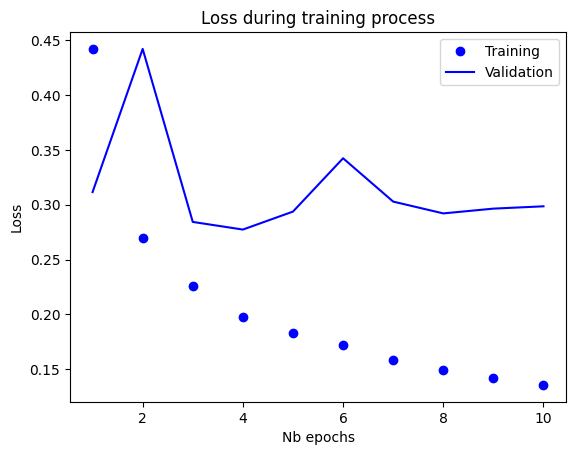

In [15]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 11)

plt.plot(epochs, loss_values, 'bo', label="Training")
plt.plot(epochs, val_loss_values, 'b', label="Validation")

plt.title("Loss during training process")
plt.xlabel("Nb epochs")
plt.ylabel("Loss")
plt.legend()

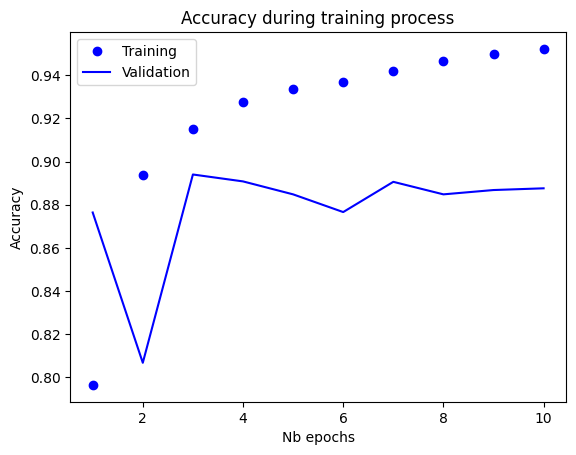

In [16]:
history_dict = history.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, 11)

plt.plot(epochs, acc_values, 'bo', label="Training")
plt.plot(epochs, val_acc_values, 'b', label="Validation")

plt.title("Accuracy during training process")
plt.xlabel("Nb epochs")
plt.ylabel("Accuracy")
plt.legend()